# PIV analysis and Plotting
Code set using data from PIV experiments on 09-28-17<br>
$U_\infty = 6$ (530rpm) <br>
Test 0: <br>
Data taken at 500Hz continuously <br>
Test 1: <br>
Data taken at 200Hz continuously <br>
Test 2: <br>
Data taken at 100Hz continuously at $U_\infty = 4.5m/sec$ (400rpm)<br>
Laser Power = 14amps <br>
Last updated: 10-03-17 <br>
Code Strucutre: <br>
- import libraries <br>
- run analysis codes <br>
- read in data <br>
- plot outer <br>
- plot inner <br>

In [1]:
## IMPORT LIBRARIES
import pandas as pd
import numpy as np
import PIV as piv
import time_series as ts
import time
import sys
import h5py
from scipy.signal import medfilt
import matplotlib.pyplot as plt
import hotwire as hw
import imp
from datetime import datetime
%matplotlib inline 
now = datetime.now()
#for setting movie
import time
import pylab as pl
from IPython import display
#for 3d plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [14]:
## import functions to be run
imp.reload(ts)
imp.reload(piv)
imp.reload(hw)
%run 'air_prop.py'
%run 'piv_outer.py'
%run 'piv_readin.py'
%run 'piv_inner.py'
#define function 
#create function to compute correlation at each time point
def autocorr(x, t):
    return np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))[0,1]            

# Read in and Filter Datasets

In [ ]:
## DATA SET READ IN ##
#data sets taken continuously (test_0, test_3)
#Parameter set
date = '092817_0'
data_delimiter = '\t'
num_images = 10917
sizex = 128
sizey = 129
walloffset = 2 #mm
side_error = 5
#determine file name
file_name = dict()
for j in range(1, num_images+1):
    file_name[j] = '/B' + str('{0:05}'.format(j)) + '.txt'
#list name of data set folders
base_name = dict()
#List the base name for each test to be read in and analyzed, names taken directly from folder
base_name[0] = '/media/drummond/My Passport/DATA/FPF/test_092817/Cam_Date=170928_Time=154444_TR_SeqPIV_MP(1x16x16_50ov_ImgCorr)=unknown'
#base_name[1] = '/media/drummond/My Passport/DATA/FPF/test_092117/Cam_Date=170921_Time=140859_TR_SeqPIV_MP(1x16x16_50ov_ImgCorr)=unknown'
[u, v, x, y, bad_im] = piv_readin(date, file_name, base_name, num_images, data_delimiter, sizex, sizey, walloffset, side_error)

In [11]:
#number of bad images
print(bad_im)



1110


# Mean Velocity Plots

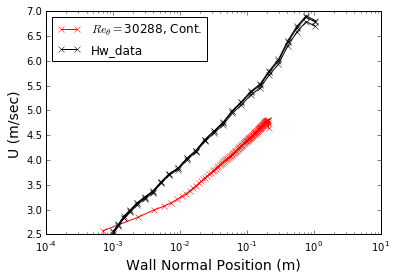

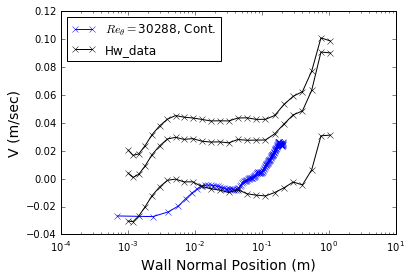

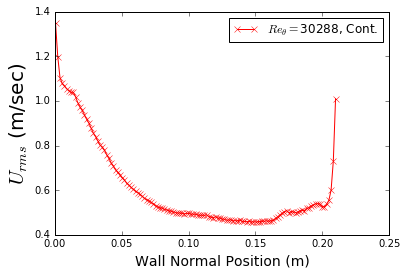

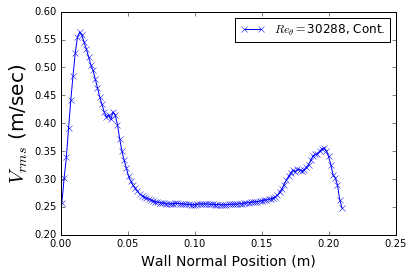

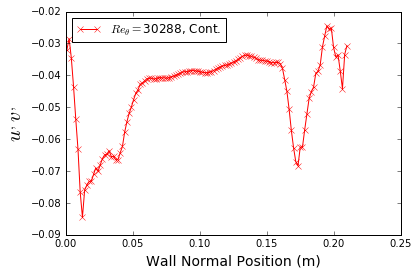

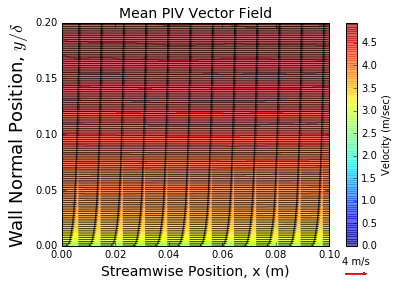

In [15]:
# Plot Outer Normalized Data
date = '092817'
legend = [r'$Re_{\theta}=$30288, Cont.', 'Hw_data']
num_tests = 1
piv_outer(date, num_tests, legend)

# Inner Normalized Plots

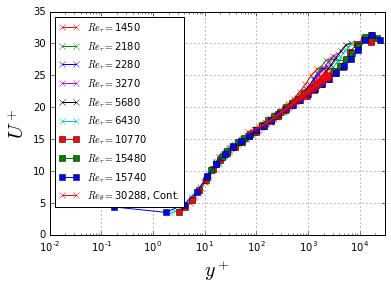

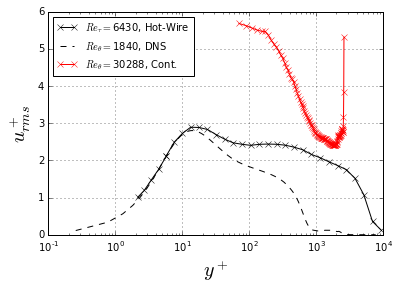

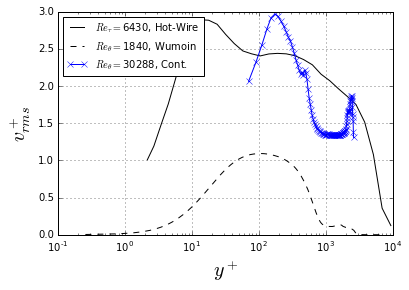

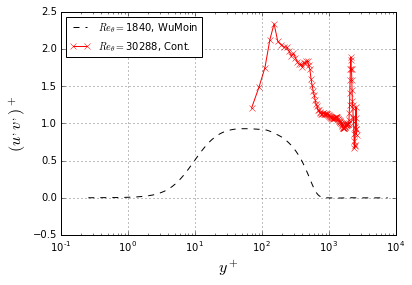

In [13]:
# Plot inner Normalized Data
date = '092817'
legend = [r'$Re_{\theta}=$30288, Cont.', r'$Re_{\theta}=$30288, 100im', r'$Re_{\theta}=$30288, 500im']
num_tests = 1
utau = .19
piv_inner(date, num_tests, utau, legend)

# Conculsions
Velocity plots: <br>
- Mean data matches well with other experimental and DNS datasets <br>
- U component collapes for all statistics examined <br>
- V component is correct order but is not resolved due to low dynamic range <br>
- CONTROL VOLUME ANALYSIS: V is order .001 $m/sec$ <br>
- PIXEL DISP PDFs: No evidence of pixel locking <br>

# To Do
- Increase dynamic range through increasing resolution of v velocity displacement by increasing $Re$ and decreasing image frame rate ($\Delta T$)

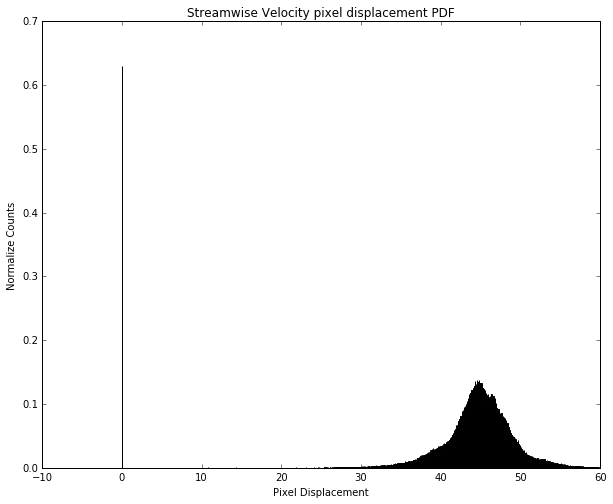

In [35]:
freq = 500 #hz
pixel_size = 0.0002 #mm/pixel
#calculate displacement in x dir
x_disp = u[0]*(1/freq)
#organize into 1-d vector
x_disp = np.array(np.reshape(x_disp, [1, 127*79*10917]))[0]
#calculate in pixel disp
x_disp = x_disp / pixel_size
#plot
plt.figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.hist(x_disp[0:1000000], bins=5000, range=[-1, 60], normed=True)
plt.title('Streamwise Velocity pixel displacement PDF')
plt.xlabel('Pixel Displacement')
plt.ylabel('Normalize Counts')
plt.show()

In [32]:
#calculate displacement in y dir
y_disp = v[0]*(1/freq)
#organize into 1-d vector
y_disp = np.array(np.reshape(y_disp, [1, 127*68*10917]))[0]
#calculate in pixel disp
y_disp = y_disp / pixel_size
#plot
plt.figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.hist(y_disp[:1000000], bins=5000, normed=True)
plt.title('Wall-normal Velocity pixel displacement PDF')
plt.xlabel('Pixel Displacement')
plt.ylabel('Normalize Counts')
plt.show()

79

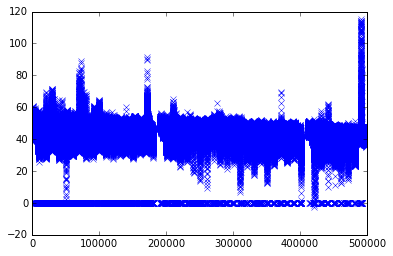

In [48]:
plt.plot(x_disp[:500000], 'x')
plt.show()

In [51]:
print(u[0,0, -1])

[ 2.5886   2.9084   3.04826  0.       0.       0.       0.       3.19847
  3.1825   3.23588  3.35742  3.43855  3.46538  3.44914  3.42728  3.44374
  3.5096   3.60773  3.66692  3.67716  3.64372  3.63653  3.62011  3.57074
  3.55116  3.3803   3.22381  2.9736   2.92389  0.       2.91796  2.87979
  2.86019  2.78057  2.76475  2.83249  2.93458  3.04123  3.11031  3.16388
  3.18433  3.13454  3.06662  3.00817  2.98178  2.95766  2.9429   2.95751
  3.0195   3.09079  3.16135  3.24334  3.34741  3.4629   3.57716  3.65776
  3.66426  3.60877  3.51339  3.4372   3.33084  3.27818  3.28128  3.38168
  3.52642  3.67951  3.82397  3.9659   4.11863  4.19286  4.19584  4.16012
  4.17845  4.14517  3.98347  3.75681  3.56992  3.42082  3.30472]


In [58]:
for j in range(0, len(x)):
    print(u[0,100, j])

[ 5.23408  4.98234  4.90069  4.88243  4.88603  4.89399  4.90822  4.90161
  4.89741  4.88325  4.85362  4.88057  4.94856  5.05395  5.13964  5.18307
  5.16816  5.08446  4.98568  4.90983  4.84691  4.79647  4.74346  4.74041
  4.76409  4.92555  5.11435  5.263    0.       0.       0.       5.97853
  6.07868  6.15536  6.09849  6.10607  0.       6.06152  6.05314  6.06262
  6.03949  6.01907  5.97595  5.97128  5.91542  5.86895  5.8049   5.73921
  5.64984  5.61483  5.67253  5.74825  5.83917  5.87283  5.95464  5.96963
  0.       0.       0.       0.       5.52098  5.46375  5.4636   5.46129
  5.47893  5.46559  5.37198  5.27386  5.18207  0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.     ]
[ 5.19449  4.95615  4.87595  4.87167  4.89297  4.92102  4.93827  4.92087
  4.9066   4.89129  4.87207  4.88006  4.89974  4.96135  5.02206  5.07855
  5.08253  5.02655  4.95149  4.89176  4.8427   4.80176  4.75976  4.76368
  4.80371  4.9595   5.13264  5.25924  0.       5.57779  5.67242 

nan